# **Decision Tree**

Decision Trees are powerful machine learning models that are used for both classification and regression problems. Decision Tree works by splitting the dataset into different parts where the node of the tree represents the siginificant attribute or feature that are important. It recursivley split the dataset based on the combination of features in a hirearchial way that result in making a prediction of a particular class.

Some terms regrading Decision Trees:

1. **Root Node**:

The topmost node represents the entire dataset.

2. **Feature Selection and Splitting**:

The algorithm selects the most informative feature based on a chosen criterion (e.g., Information Gain or Gini Impurity) and splits the dataset into subsets accordingly.

3. **Decision Nodes**:

Each decision node represents a test condition based on the selected feature. The tree branches into different paths depending on the outcome of this test condition.

4. **Recursive Splitting**:

The splitting process continues recursively for each subset at decision nodes, creating new decision nodes and branches until a stopping criterion is met.

5. **Leaf Nodes**:

When the recursive splitting reaches a point where further subdivision is not beneficial or a predefined stopping criterion is satisfied, the process stops, and leaf nodes are formed.

6. **Prediction**:

To make a prediction for a new instance, the decision tree traverses the tree from the root, following the branches based on the values of the features. It continues this traversal until it reaches a leaf node. The predicted outcome is associated with the class or value of that leaf node.

Here is a sample dataset for understanding:

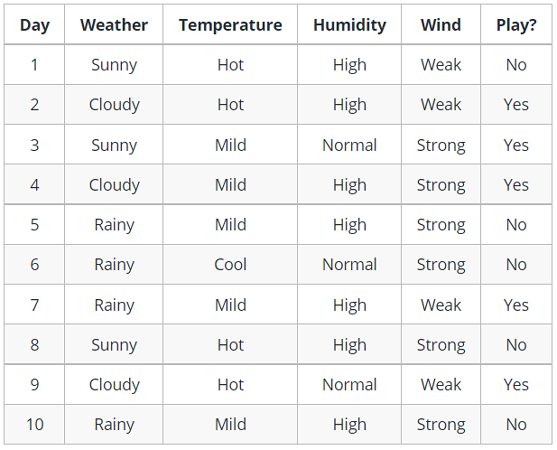

The tree Build from the dataset can be like this:

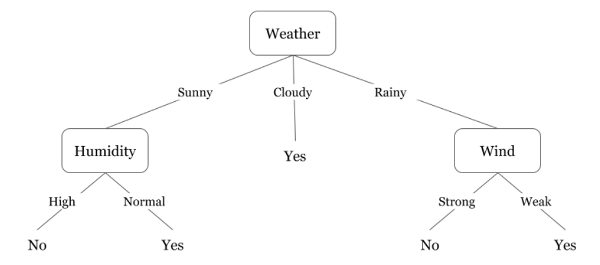

In [107]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, f1_score, confusion_matrix
from sklearn.metrics import precision_recall_curve

data = load_iris()

In [ ]:
df = pd.DataFrame(data['data'])
df.columns = data.feature_names
df['target'] = data.target

In [ ]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## **Calculating the Entropy of labels**

In [ ]:

def calculate_entropy(labels):
    class_counts = labels.value_counts()
    print(class_counts)
    p = class_counts / len(labels)
    entropy = -sum(p * p.apply(math.log2))
    return entropy

entropy_full = calculate_entropy(y)

Yes    7
No     3
Name: PlayTennis, dtype: int64


## **Calculating Information Gain on Each Feature sets**

In [ ]:
def calculate_information_gain(data, feature, target):
    entropy_before = calculate_entropy(data[target]) # Uncertainity on the entire dataset
    weighted_entropy_after = 0
    unique_values = data[feature].unique()

    for value in unique_values:
        subset = data[data[feature] == value] # Weare taking each subset based on unique features
        weight = len(subset) / len(data)
        entropy_after = calculate_entropy(subset[target]) # Calculating the entropy after the split on each subset
        weighted_entropy_after += weight * entropy_after

    information_gain = entropy_before - weighted_entropy_after
    return information_gain

In [ ]:
ig_list = []

for i in range(len(df.columns) - 1):
    information_gain = calculate_information_gain(df, df.columns[i], 'target')
    ig_list.append(information_gain)

0    50
1    50
2    50
Name: target, dtype: int64
0    8
1    1
Name: target, dtype: int64
0    4
1    1
2    1
Name: target, dtype: int64
0    2
Name: target, dtype: int64
0    4
Name: target, dtype: int64
0    8
1    2
Name: target, dtype: int64
0    5
1    1
Name: target, dtype: int64
0    3
Name: target, dtype: int64
0    5
Name: target, dtype: int64
0    1
Name: target, dtype: int64
1    3
2    3
0    1
Name: target, dtype: int64
1    5
0    2
2    1
Name: target, dtype: int64
0    3
1    1
Name: target, dtype: int64
1    5
0    2
Name: target, dtype: int64
0    1
Name: target, dtype: int64
0    1
Name: target, dtype: int64
1    1
Name: target, dtype: int64
2    5
1    2
Name: target, dtype: int64
2    3
1    1
Name: target, dtype: int64
2    4
1    1
Name: target, dtype: int64
2    6
1    3
Name: target, dtype: int64
1    2
Name: target, dtype: int64
1    2
2    1
Name: target, dtype: int64
1    4
2    2
Name: target, dtype: int64
1    4
2    2
Name: target, dtype: int64
1    5


In [ ]:
ig_list

[]

## **Building the Decision Tree Classifier**

In [ ]:
class DecisionTree:

    def __init__(self, max_depth = None):
        self.max_depth = max_depth

    def calculate_entropy(self, labels):
        class_counts = labels.value_counts()
        probabilities = class_counts / len(labels)
        entropy = -sum(probabilities * np.log2(probabilities))
        return entropy

    def calculate_information_gain(self, data, feature, target):
        entropy_before = self.calculate_entropy(data[target]) # Calculate the initial entropy
        weighted_entropy_after = 0
        unique_values = data[feature].unique() # Finding the unique number of values from the feature

        for value in unique_values:
            subset = data[data[feature] == value] # Selecting each subset of values
            weight = len(subset) / len(data)
            entropy_after = self.calculate_entropy(subset[target]) # Calculate the entropy of the subset's target values
            weighted_entropy_after += weight * entropy_after # Adding all possible values of features

        information_gain = entropy_before - weighted_entropy_after # Calculation of information gain
        return information_gain


    def find_best_split(self, data, target):
        features = data.columns[:-1] # Selecting all the features except the last one which is the target
        best_feature = None
        best_information_gain = -1 # Initialize information gain to -1 (no IG)

        for feature in features:
            information_gain = self.calculate_information_gain(data, feature, target)

            # Comparing current and previous information gains
            if information_gain > best_information_gain:
                best_feature = feature
                best_information_gain = information_gain

        return best_feature

    def build_tree(self, data, target, depth = 0):
        # Stopping criteria or base case for stopping recursion for building tree
        if depth == self.max_depth or len(data[target].unique()) == 1:
            majority_class = data[target].mode().iloc[0]
            return {"class": majority_class}

        best_feature = self.find_best_split(data, target)

        subsets = {}
        for value in data[best_feature].unique():
            subset = data[data[best_feature] == value]
            subsets[value] = self.build_tree(subset, target, depth + 1)

        return {'feature': best_feature, 'subsets': subsets}

    def fit(self, data, target):
        self.tree = self.build_tree(data, target)

    def predict_instance(self, instance, tree):
        if 'class' in tree:
            return tree['class']
        else:
            feature_value = instance[tree['feature']]
            if feature_value in tree['subsets']:
                return self.predict_instance(instance, tree['subsets'][feature_value])
            else:
                return max(tree['subsets'], key = lambda k: len(tree['subsets'][k]))

    def predict(self, data):
        return data.apply(lambda instance: self.predict_instance(instance, self.tree), axis = 1)

In [ ]:
dt = DecisionTree(max_depth = 10)

In [ ]:
dt.fit(df, 'target')

In [ ]:
predictions = dt.predict(df)

In [ ]:
predictions

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Length: 150, dtype: int64

In [ ]:
df['target']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

## **Using Scikit-Learn Decision Tree**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data['data'], data['target'], test_size = 0.2, random_state = 42)

In [ ]:
dt_classifier = DecisionTreeClassifier(criterion='entropy')
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
predictions = dt_classifier.predict(X_test)

## **Evaluation Metrics**

### **1. Accuracy**

Accuracy is the most straightforward way of evaluating a classification model, it just compare the prediction and actual lables and return the score based on the prediction that are correct and matches with the actual labels. A low accuracy indicates that the prediction and actual labels are very different or has high deviations. If the accuracy is high, indicates that the model is able to predict values closer to the actual values.

In [ ]:
print("Accuracy Score:", accuracy_score(predictions, y_test))

Accuracy Score: 1.0


### **2. Precision**

Precision is an evaluation metrics which talks about how much proportion of the data classified as True is actually correct. In other ways precision calculates the model ability of predict the postive classes as it is. A high precision score indicates that the model is able to capture most of the True Postives among the actual number of True Postives.

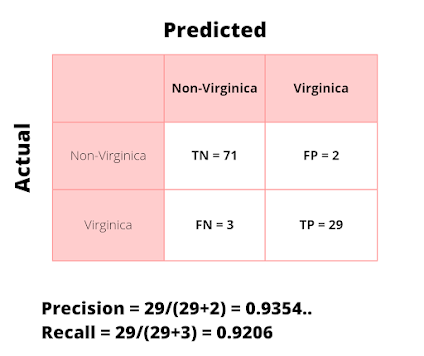$$ \text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}} $$



In [ ]:
precision = precision_score(predictions, y_test, average='macro')
print("Precision Score:", precision)

Precision Score: 1.0


### **3. Recall**

Recall talks about what proportion of actual postives was indentified correctly by the model. Or it says about the models exploration ability to indentify true positives from the total number of actual positive instances.

$$ \text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}} $$


In [ ]:
recall = recall_score(predictions, y_test, average='macro')
print("Recall Score:", recall)

Recall Score: 1.0


### **4. F1-Score**

Precision and Recall can be combined to get a single metrics know as the f1-score also known as f-score. F1-scores gives the proportion of balance between precision and recall scores that allows us to combine two scores together to get the overal idea of models prediction. The higher the f1-score the more good the models predictions.

$$
F_1 = \frac{2 \cdot \text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

In [ ]:
f1_score_ = f1_score(predictions, y_test, average='macro')
print("F1-Score:", f1_score_)

F1-Score: 1.0


### **5. Confusion Matrix**

Confusion Matrix is a table representation that help us to determine the correct and incorrect predictions made by the model. It provides a detailed breakdown of the model's predictions and compares them to the actual true outcomes. The values along the left to right diagonal of a confusion matrix talks about the correct predictions made by the model.

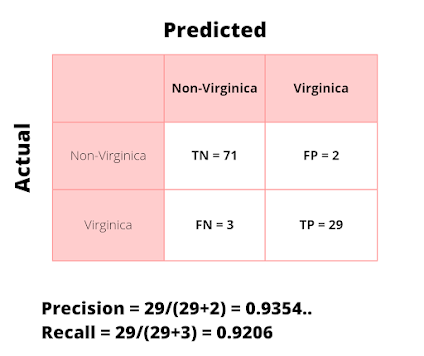



[0 1 2]
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


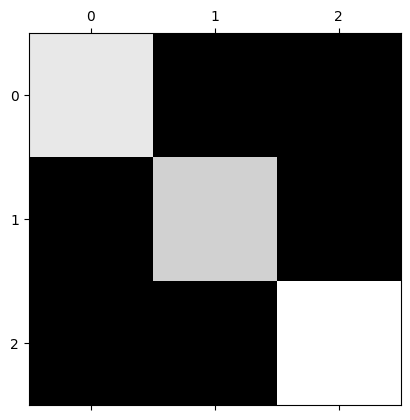

In [111]:
print(np.unique(y_test))
print(confusion_matrix(predictions, y_test))

plt.matshow(confusion_matrix(predictions, y_test), cmap = plt.cm.gray)
plt.show()

### **Decision Tree Structure**



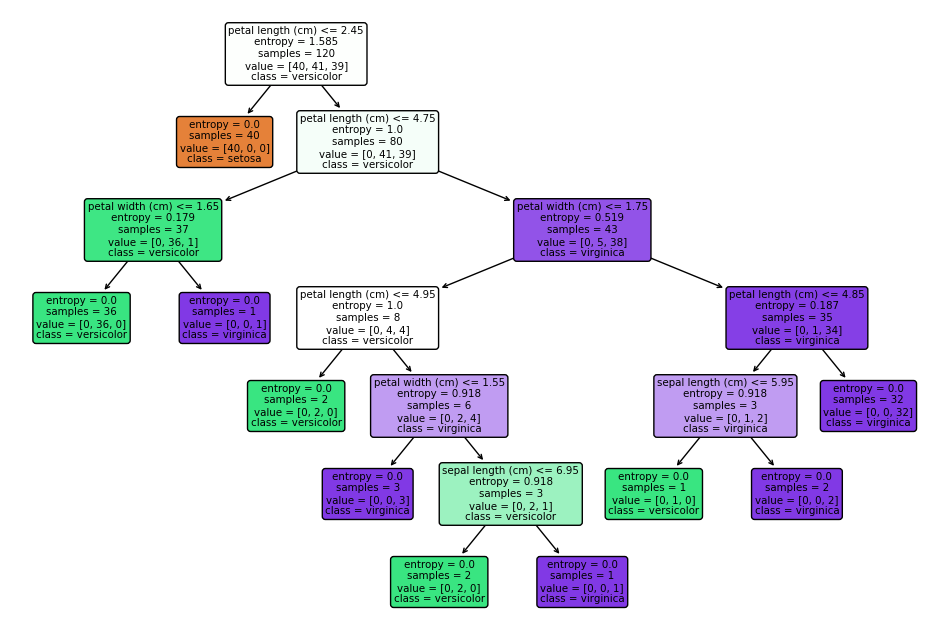

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(dt_classifier, feature_names=data.feature_names, class_names=data.target_names, filled=True, rounded=True)
plt.show()